In [ ]:
import pandas as pd
from re import search
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%pip install pandas_bokeh
import pandas_bokeh

In [ ]:
xls = pd.ExcelFile('OpenBarre_QUEST_cleaned.xlsx')
fb_page_reach = pd.read_excel(xls, 'FB Page Reach')
ig_page_reach = pd.read_excel(xls, 'IG Page Reach')
fb_page_visits = pd.read_excel(xls, 'FB Page Visits')
ig_prof_visits = pd.read_excel(xls, 'IG Profile Visits')
new_fb_likes = pd.read_excel(xls, 'New FB Likes')
new_ig_followers = pd.read_excel(xls, 'New IG Followers')
ads_content_insights = pd.read_excel(xls, 'Ads Content Insights')
fb_content_insights = pd.read_excel(xls, 'FB Content Insights')
ig_content_insights = pd.read_excel(xls, 'IG Content Insights')


In [ ]:
fb_content_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Caption              470 non-null    object 
 1   Post time            476 non-null    object 
 2   Reach                476 non-null    int64  
 3   Likes and reactions  476 non-null    int64  
 4   Sticker taps         0 non-null      float64
 5   Replies              0 non-null      float64
 6   Link clicks          476 non-null    int64  
 7   Comments             476 non-null    int64  
 8   Shares               476 non-null    int64  
 9   Results              0 non-null      float64
 10  Cost per result      1 non-null      float64
dtypes: float64(4), int64(5), object(2)
memory usage: 41.0+ KB


In [ ]:
for index, row in fb_content_insights.iterrows():
  date_string = row['Post time']
  match = search('\d{2}:\d{2}:\d{2}', date_string)
  print(match.group(0))

12:13:36
19:52:30
13:14:29
13:54:07
06:05:37
06:18:51
10:22:22
11:36:38
08:06:52
07:16:04
18:15:17
06:08:48
09:25:46
06:49:12
08:27:26
15:43:34
09:24:38
17:14:23
11:45:46
05:58:13
04:05:59
07:50:09
08:34:16
08:32:26
17:45:37
05:11:31
05:21:02
04:02:05
06:36:13
07:40:36
13:44:32
07:52:48
08:58:00
06:24:09
10:25:18
03:24:12
06:57:51
07:01:47
05:26:36
09:20:35
05:16:48
12:12:27
12:29:43
18:19:28
18:45:58
08:08:07
12:10:20
11:39:27
11:32:28
12:20:35
08:16:56
19:43:19
05:41:58
13:00:24
12:37:23
08:58:04
10:09:41
12:17:46
17:38:54
05:34:43
19:35:04
20:56:34
11:00:48
06:15:18
21:08:12
19:39:40
11:10:12
05:08:34
12:29:33
09:49:23
12:17:39
09:10:03
09:58:28
14:15:36
18:27:58
08:45:36
16:19:00
15:53:46
09:40:39
17:16:03
13:52:10
07:35:35
07:37:19
06:40:38
14:42:06
08:56:04
08:55:37
11:06:20
11:05:54
08:14:12
14:45:27
06:10:53
05:51:42
06:05:39
07:26:49
06:11:11
22:04:40
12:17:06
07:35:05
06:04:56
05:27:42
22:06:04
06:14:25
06:42:39
22:14:35
05:39:14
05:45:02
05:32:18
22:11:08
06:45:41
05:04:37
0

In [ ]:
fb_content_insights['Post time'] = pd.to_datetime(fb_content_insights['Post time'], format="%Y-%m-%dT%H:%M:%S")
fb_content_insights

,Caption,Post time,Reach,Likes and reactions,Sticker taps,Replies,Link clicks,Comments,Shares,Results,Cost per result
0,Join us at the barre for a FREE first class& \...,2021-11-03 12:13:36,98,1,NaN,NaN,0,0,0,NaN,NaN
1,The Community Director at OpenBarre is a part ...,2021-11-02 19:52:30,910,11,NaN,NaN,15,0,3,NaN,NaN
2,"SO CLOSE to bringing back those smiles, hugs, ...",2021-10-28 13:14:29,125,3,NaN,NaN,18,0,0,NaN,NaN
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,2021-10-24 13:54:07,286,13,NaN,NaN,9,1,0,NaN,NaN
4,"T'who_x0019_ s an OpenBarre class for, really?...",2021-10-19 06:05:37,948,7,NaN,NaN,16,4,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
471,HUGE congrats to Beth Giunta for 200 classes w...,2018-10-13 07:30:37,509,84,NaN,NaN,189,8,1,NaN,NaN
472,"Tickets are non-refundable, but can be transf...",2018-10-10 07:55:57,0,5,NaN,NaN,0,0,4,NaN,NaN
473,"WeWork freebies at OpenBarre this Friday, 10/1...",2018-10-09 17:09:36,0,0,NaN,NaN,0,0,0,NaN,NaN
474,It's day one of #sundayscaries at OpenBarre! T...,2018-10-07 09:35:40,0,5,NaN,NaN,0,0,0,NaN,NaN


In [ ]:
fig = px.line(fb_content_insights, x='Post time', y='Reach',  title="Facebook Page Reach per Date")
fig.show()

In [ ]:
fig = px.line(fb_content_insights, x='Post time', y='Likes and reactions',  title="Facebook Page Likes per Date")
fig.show()


In [ ]:
def time_in_range(start, end, current):
    return start <= current < end


column_names = ["Time range", "Reach", "Likes and reactions", "Link clicks", "Comments"]
fb_content_insights_vstime = pd.DataFrame(columns = column_names)
fb_content_insights_vstime

for index, row in fb_content_insights.iterrows():
  curr_time = row['Post time'].time()
  if time_in_range(datetime.time(0, 0, 0), datetime.time(5, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['0-6', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]
  elif time_in_range(datetime.time(6, 0, 0), datetime.time(8, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['6-9', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]
  elif time_in_range(datetime.time(9, 0, 0), datetime.time(11, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['9-12', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]
  elif time_in_range(datetime.time(12, 0, 0), datetime.time(14, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['12-15', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]
  elif time_in_range(datetime.time(15, 0, 0), datetime.time(17, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['15-18', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]
  elif time_in_range(datetime.time(18, 0, 0), datetime.time(20, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['18-21', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]
  elif time_in_range(datetime.time(21, 0, 0), datetime.time(23, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = ['21-24', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments']]


fb_content_insights_vstime

,Time range,Reach,Likes and reactions,Link clicks,Comments
0,12-15,98,1,0,0
1,18-21,910,11,15,0
2,12-15,125,3,18,0
3,12-15,286,13,9,1
4,6-9,948,7,16,4
...,...,...,...,...,...
471,6-9,509,84,189,8
472,6-9,0,5,0,0
473,15-18,0,0,0,0
474,9-12,0,5,0,0


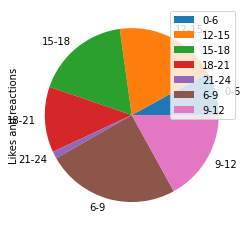

In [ ]:
fb_content_insights_vstime.groupby(['Time range']).sum().plot(kind='pie', y='Likes and reactions')


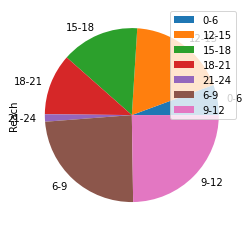

In [ ]:
fb_content_insights_vstime.groupby(['Time range']).sum().plot(kind='pie', y='Reach')

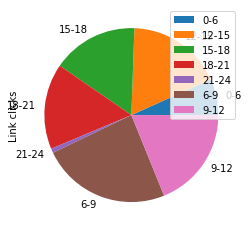

In [ ]:
fb_content_insights_vstime.groupby(['Time range']).sum().plot(kind='pie', y='Link clicks')

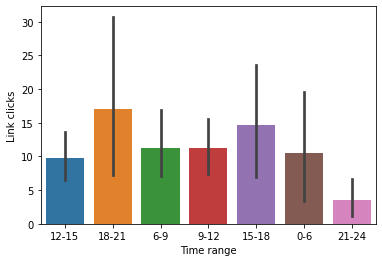

In [ ]:
sns.barplot(data=fb_content_insights_vstime, x="Time range", y="Link clicks")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



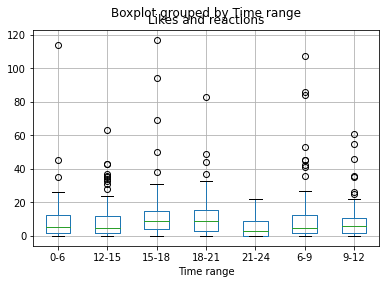

In [ ]:
fb_content_insights_vstime.boxplot(by = "Time range", column = ["Likes and reactions"])

# Observations:
# 18-21 time range yields the highest median amount of likes/reactions
# lot of consistent positive outliers in the range of 20-40 likes/reactions within the 12-15 time range
# 6-9 and 9-12 time ranges have lower median than 18-21 time range but have more positive outliers with larger values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



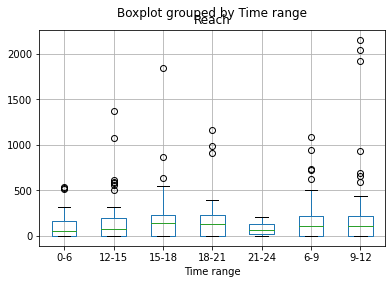

In [ ]:
fb_content_insights_vstime.boxplot(by = "Time range", column = ["Reach"])

# Observations:
# 15-18 time range has highest median for reach (18-21 is a very close second)
# lot of consistent outliers again for 12-15 time range, around the 500-700 mark
# 21-24 time range has a very low reach compared to the other time ranges
# 9-12 time range has some super high outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



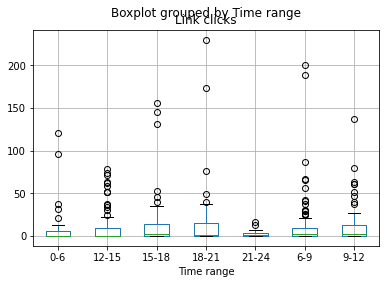

In [ ]:
fb_content_insights_vstime.boxplot(by = "Time range", column = ["Link clicks"])

# Observations:
# 6-9, 9-12, and 12-15 time ranges seem to dominate when it comes to consistency in positive outliers between the 25-80 range of link clicks
# 21-24 time range yields a low amount of link clicks


In [ ]:
# So far:
 
# Cleaned data by removing rows with missing values and separating dataframes that were present in the same tab
# of the spreadsheet.

# Converted date/time strings of data into Datetime objects so we can filter through date and time easily

# Created new dataframe which groups the Datetime objects into time ranges (using military time) and places the 
# FB content insights (reach, likes, comments, etc.) into 1 of 7 such time ranges

# Used new dataframe to create boxplots showing the relationships between the different interactions of FB posts and the
# time they were posted


# Next Steps

# Dig deeper into outliers and why they may exist

# Repeat same process for IG post insights

# Create pie charts in addition to box plots to show which time ranges had the highest percentage of interactions

# Start looking into different factors that may affect interaction other than date/time: caption length, specific
# buzz words, etc.